# DRUG CLASSIFICATION - KAGGLE DATASET

This is a Python Supervised machine learning algorithm using classification using Random forest classifier and decision tree classifier

Types of classification used in this project

    - Logistic Regression
    - Random Forest
    - Decision tree

In [49]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [50]:
drug = pd.read_csv("D:\Abhishek\E Drive\Padhai\Programming\Python\Projects\Drug_Classification_Logistic_Regression\drug200.csv")

In [51]:
drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [52]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [53]:
#Handling the categorical columns

In [54]:
drug['Sex'] = drug['Sex'].map({'M': 1, 'F': 2})
drug['BP'] = drug['BP'].map({'HIGH': 1, "NORMAL" : 2, "LOW" : 3})
drug['Cholesterol'] = drug['Cholesterol'].map({'HIGH': 1, "NORMAL" : 2})
drug["Drug"] = drug["Drug"].map({"DrugY":1, "drugC":2, "drugX":3, "drugA":4, "drugB":5})

In [55]:
#Splitting into training and testing dataset

In [56]:
X = drug.drop('Drug',axis=1)
y = drug['Drug']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# LOGISTIC REGRESSION

# We will be scaling the data now

What do These Terms Mean?

Scale generally means to change the range of the values. The shape of the distribution doesn’t change. Think about how a scale model of a building has the same proportions as the original, just smaller. That’s why we say it is drawn to scale. The range is often set at 0 to 1.

Standardize generally means changing the values so that the distribution’s standard deviation equals one. Scaling is often implied.

Normalize can be used to mean either of the above things (and more!). I suggest you avoid the term normalize, because it has many definitions and is prone to creating confusion.

If you use any of these terms in your communication, I strongly suggest you define them.

Why Scale, Standardize, or Normalize?

Many machine learning algorithms perform better or converge faster when features are on a relatively similar scale and/or close to normally distributed. Examples of such algorithm families include:

    - linear and logistic regression
    - nearest neighbors


In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [59]:
print("The accuracey of our model is using Logistic regression is ",model.score(X_test,y_test)*100,"%")

The accuracey of our model is using Logistic regression is  85.0 %


In [60]:
#Plotting the confusion matrix for our model

<AxesSubplot:>

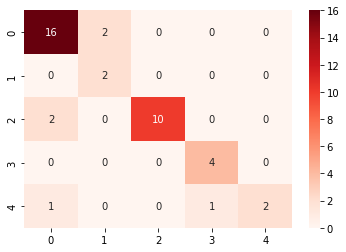

In [61]:
predict = model.predict(X_test)
cf = confusion_matrix(y_test,predict)
sns.heatmap(cf, cmap='Reds',annot=True)

# Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [63]:
print("The accuracey of our model using Random forrest is ",model.score(X_test,y_test)*100,"%")

The accuracey of our model using Random forrest is  97.5 %


<AxesSubplot:>

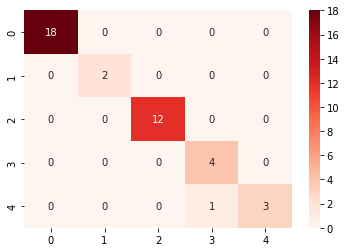

In [64]:
predict = model.predict(X_test)
cf = confusion_matrix(y_test,predict)
sns.heatmap(cf, cmap='Reds',annot=True)

# Decision Tree Classifier

In [65]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [66]:
print("The accuracey of our model using Decision tree classifier is ",model.score(X_test,y_test)*100,"%")

The accuracey of our model using Decision tree classifier is  97.5 %


<AxesSubplot:>

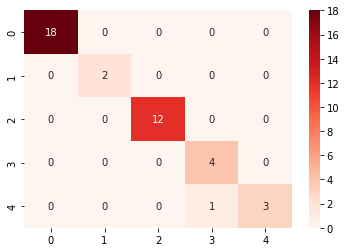

In [67]:
predict = model.predict(X_test)
cf = confusion_matrix(y_test,predict)
sns.heatmap(cf, cmap='Reds',annot=True)